
























































****

















































**data**

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [318]:
df = pd.DataFrame()

In [319]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [320]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


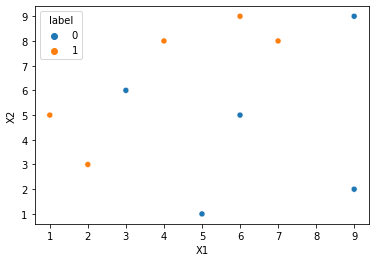

In [321]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [322]:
df['weights'] = 1/df.shape[0]

In [323]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [324]:
from sklearn.tree import DecisionTreeClassifier

In [325]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [326]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [327]:
# Step 2 - Train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(167.4, 163.07999999999998, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

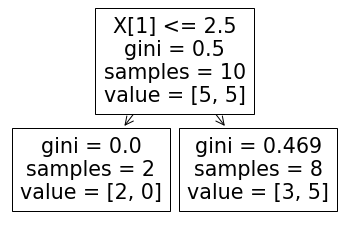

In [328]:
from sklearn.tree import plot_tree
plot_tree(dt1)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


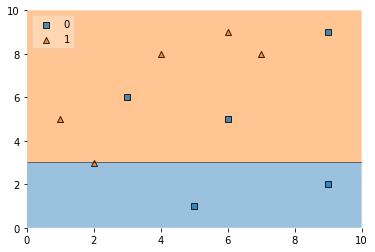

In [329]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [330]:
df['y_pred'] = dt1.predict(X)

In [331]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [332]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))

In [333]:
# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [334]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [335]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [336]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [337]:
df['updated_weights'].sum()

0.9165153319682015

In [338]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [339]:
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [340]:
df['nomalized_weights'].sum()

1.0

In [341]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

In [342]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [343]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [344]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [345]:
index_values = create_new_dataset(df)

index_values

[4, 2, 0, 8, 3, 9, 6, 8, 4, 0]

In [346]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [347]:
second_df

,X1,X2,label,weights
4,5,1,0,0.1
2,3,6,0,0.1
0,1,5,1,0.1
8,9,9,0,0.1
3,4,8,1,0.1
9,9,2,0,0.1
6,6,5,0,0.1
8,9,9,0,0.1
4,5,1,0,0.1
0,1,5,1,0.1


In [348]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [349]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [350]:
dt2.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(167.4, 163.07999999999998, 'X[0] <= 4.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(83.7, 54.360000000000014, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]')]

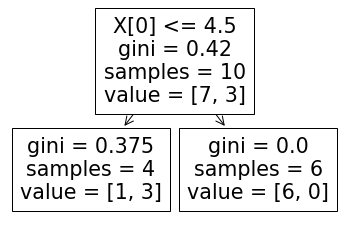

In [351]:
plot_tree(dt2)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


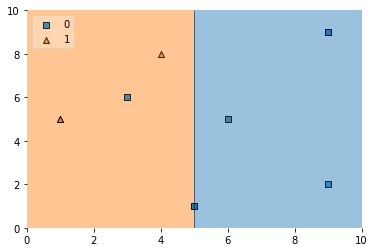

In [352]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [353]:
second_df['y_pred'] = dt2.predict(X)

In [354]:
second_df

,X1,X2,label,weights,y_pred
4,5,1,0,0.1,0
2,3,6,0,0.1,1
0,1,5,1,0.1,1
8,9,9,0,0.1,0
3,4,8,1,0.1,1
9,9,2,0,0.1,0
6,6,5,0,0.1,0
8,9,9,0,0.1,0
4,5,1,0,0.1,0
0,1,5,1,0.1,1


In [355]:
alpha2 = calculate_model_weight(0.1)

In [356]:
alpha2

1.0986122886681098

In [357]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [358]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [359]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
4,5,1,0,0.1,0,0.033622
2,3,6,0,0.1,1,0.297427
0,1,5,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622
9,9,2,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
8,9,9,0,0.1,0,0.033622
4,5,1,0,0.1,0,0.033622
0,1,5,1,0.1,1,0.033622


In [360]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [361]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
4,5,1,0,0.1,0,0.033622,0.056034
2,3,6,0,0.1,1,0.297427,0.495694
0,1,5,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
9,9,2,0,0.1,0,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
4,5,1,0,0.1,0,0.033622,0.056034
0,1,5,1,0.1,1,0.033622,0.056034


In [362]:
second_df['nomalized_weights'].sum()

0.9999999999999999

In [363]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [364]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [365]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
4,5,1,0,0.1,0,0.056034,0.000000,0.056034
2,3,6,0,0.1,1,0.495694,0.056034,0.551728
0,1,5,1,0.1,1,0.056034,0.551728,0.607762
8,9,9,0,0.1,0,0.056034,0.607762,0.663796
3,4,8,1,0.1,1,0.056034,0.663796,0.719830
9,9,2,0,0.1,0,0.056034,0.719830,0.775864
6,6,5,0,0.1,0,0.056034,0.775864,0.831898
8,9,9,0,0.1,0,0.056034,0.831898,0.887932
4,5,1,0,0.1,0,0.056034,0.887932,0.943966
0,1,5,1,0.1,1,0.056034,0.943966,1.000000


In [366]:
index_values = create_new_dataset(second_df)

In [367]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [368]:
third_df

,X1,X2,label,weights
3,4,8,1,0.1
0,1,5,1,0.1
6,6,5,0,0.1
0,1,5,1,0.1
0,1,5,1,0.1
3,4,8,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1


In [369]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


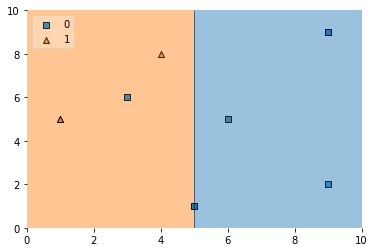

In [370]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [371]:
third_df['y_pred'] = dt3.predict(X)

In [372]:
third_df

,X1,X2,label,weights,y_pred
3,4,8,1,0.1,0
0,1,5,1,0.1,1
6,6,5,0,0.1,1
0,1,5,1,0.1,0
0,1,5,1,0.1,1
3,4,8,1,0.1,0
0,1,5,1,0.1,0
0,1,5,1,0.1,0
0,1,5,1,0.1,0
0,1,5,1,0.1,1


In [373]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [374]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


### Prediction

In [375]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [376]:
dt2.predict(query)

array([1])

In [377]:
dt3.predict(query)

array([1])

In [378]:
alpha1*1 + alpha2*(1) + alpha3*(1)

1.09861228866811

In [379]:
np.sign(1.09)

1.0

In [380]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1])

In [381]:
dt2.predict(query)

array([0])

In [382]:
dt3.predict(query)

array([0])

In [383]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

-0.2513144282809062

In [384]:
np.sign(-0.25)

-1.0

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
concrete = pd.read_csv('datasets/concrete_data.csv')

concrete.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [25]:
X = concrete.drop('csMPa', axis=1)

Y = concrete['csMPa']

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### AdaBoostRegressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

In [27]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [28]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), 
                            n_estimators=100, 
                            learning_rate=1.0)

ada_reg.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=4,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=1.0, loss='linear', n_estimators=100,
                  random_

In [29]:
ada_reg.estimator_weights_

array([1.49133403, 1.53052815, 1.20539511, 1.09574642, 0.97429071,
       1.09475162, 1.6400433 , 1.20711549, 1.11068646, 0.99534986,
       0.70656228, 0.88642136, 0.84546933, 0.88129203, 1.00464611,
       0.72864448, 0.86877425, 0.82084401, 0.76102455, 0.68235022,
       0.5886617 , 0.99794381, 0.73003261, 0.9001855 , 0.91055839,
       0.47442618, 0.70385147, 0.72170535, 0.58221069, 0.67863394,
       0.82709503, 0.89295027, 0.6325679 , 0.6820979 , 0.29035839,
       0.89394618, 0.12431449, 0.66996017, 0.75190189, 0.40077396,
       0.78567991, 0.37576437, 0.72475545, 0.86917828, 0.53094667,
       0.11400981, 0.79511126, 0.67900124, 0.60775422, 0.32633126,
       0.68953063, 0.89535889, 0.63228986, 0.56399532, 0.47558249,
       0.75991179, 0.4365817 , 0.40232909, 0.53862839, 0.89907097,
       0.69620017, 0.39852084, 0.85348036, 0.74362464, 0.45291041,
       0.97208233, 0.90018613, 0.82478952, 0.884847  , 0.69630155,
       0.68608316, 1.1948191 , 0.30855689, 0.93168825, 1.23490

In [30]:
y_pred = ada_reg.predict(x_test)

In [31]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7637438243382526

In [32]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2), 
                            n_estimators=200, 
                            learning_rate=0.5)

ada_reg.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=2,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=0.5, loss='linear', n_estimators=200,
                  random_

In [35]:
ada_reg.estimator_weights_

array([0.63426005, 0.60982095, 0.51558585, 0.59743413, 0.50597359,
       0.5501901 , 0.43571767, 0.45815181, 0.47206115, 0.48118667,
       0.52131331, 0.42300327, 0.24937078, 0.40002789, 0.42615773,
       0.40038301, 0.26949074, 0.31626053, 0.47404056, 0.25515712,
       0.36191392, 0.40654674, 0.38910625, 0.32366379, 0.36057827,
       0.48801028, 0.33538976, 0.53379365, 0.45418146, 0.39401196,
       0.47864616, 0.39379151, 0.35456871, 0.40726684, 0.26797921,
       0.35436871, 0.28925967, 0.49738001, 0.28419553, 0.42762124,
       0.37213756, 0.31088798, 0.33519785, 0.2752945 , 0.34796323,
       0.38212219, 0.24322435, 0.52122316, 0.35335263, 0.33784006,
       0.23479836, 0.46842135, 0.35014787, 0.4495229 , 0.32915367,
       0.46623993, 0.23667271, 0.41496195, 0.31075669, 0.31100976,
       0.54303051, 0.26692011, 0.29567758, 0.33302116, 0.45161777,
       0.37496589, 0.30189569, 0.26650757, 0.26119434, 0.50938858,
       0.35965189, 0.42308633, 0.34620675, 0.34269879, 0.27455

In [33]:
y_pred = ada_reg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

In [ ]:
#Classification

In [1]:
import pandas as pd

In [2]:
bank_data = pd.read_csv('datasets/bank_data_processed.csv')

bank_data.head()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,34,180,1,3,0,0,0,0,0
1,38,130,4,3,134,0,0,0,0
2,46,193,2,3,0,0,0,0,0
3,38,119,1,2,0,0,1,1,1
4,42,141,3,3,0,1,1,1,0


In [3]:
X = bank_data.drop('CreditCard', axis=1)

Y = bank_data['CreditCard']

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### AdaBoostClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

Here we use the SAMME algorithm (Stagewise Additive Modeling) using a Multi-class Exponential loss function

In [22]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                             n_estimators=100, 
                             algorithm='SAMME', 
                             learning_rate=1.0)

ada_clf.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

In [23]:
ada_clf.estimator_weights_

array([1.38304233, 0.86472318, 0.5062854 , 0.37327384, 0.63579038,
       0.36351864, 0.35062442, 0.23291442, 0.23453011, 0.43230428,
       0.31151067, 0.1173464 , 0.16427053, 0.29924934, 0.25313717,
       0.12893066, 0.26252305, 0.1001835 , 0.15495125, 0.02582821,
       0.02975355, 0.16770906, 0.0644971 , 0.04960454, 0.12191089,
       0.06933793, 0.02487219, 0.02631332, 0.04629339, 0.06770466,
       0.0246498 , 0.02434968, 0.0245605 , 0.02426254, 0.02406395,
       0.07087827, 0.06716122, 0.02278981, 0.02397429, 0.0236903 ,
       0.02341296, 0.02314203, 0.02287731, 0.02261857, 0.02255138,
       0.02229993, 0.02237124, 0.1333321 , 0.202874  , 0.08439972,
       0.06932067, 0.06621734, 0.09710119, 0.19150384, 0.21286471,
       0.16510413, 0.1319188 , 0.18311914, 0.05874299, 0.05962975,
       0.07256347, 0.06597335, 0.10927666, 0.12131215, 0.1090076 ,
       0.07356853, 0.13071192, 0.14110893, 0.15393991, 0.04192711,
       0.02067584, 0.13297132, 0.11760853, 0.09886247, 0.05586

In [24]:
y_pred = ada_clf.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8333333333333334

Here we are using SAMME.R which relies on class probabilities.

In [28]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                             n_estimators=100, 
                             algorithm='SAMME.R', 
                             learning_rate=0.5)

ada_clf.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [29]:
y_pred = ada_clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.8229166666666666

In [ ]:
%matplotlib inline


# Multi-class AdaBoosted Decision Trees

This example reproduces Figure 1 of Zhu et al [1]_ and shows how boosting can
improve prediction accuracy on a multi-class problem. The classification
dataset is constructed by taking a ten-dimensional standard normal distribution
and defining three classes separated by nested concentric ten-dimensional
spheres such that roughly equal numbers of samples are in each class (quantiles
of the $\chi^2$ distribution).

The performance of the SAMME and SAMME.R [1]_ algorithms are compared. SAMME.R
uses the probability estimates to update the additive model, while SAMME  uses
the classifications only. As the example illustrates, the SAMME.R algorithm
typically converges faster than SAMME, achieving a lower test error with fewer
boosting iterations. The error of each algorithm on the test set after each
boosting iteration is shown on the left, the classification error on the test
set of each tree is shown in the middle, and the boost weight of each tree is
shown on the right. All trees have a weight of one in the SAMME.R algorithm and
therefore are not shown.

.. [1] J. Zhu, H. Zou, S. Rosset, T. Hastie, "Multi-class AdaBoost", 2009.


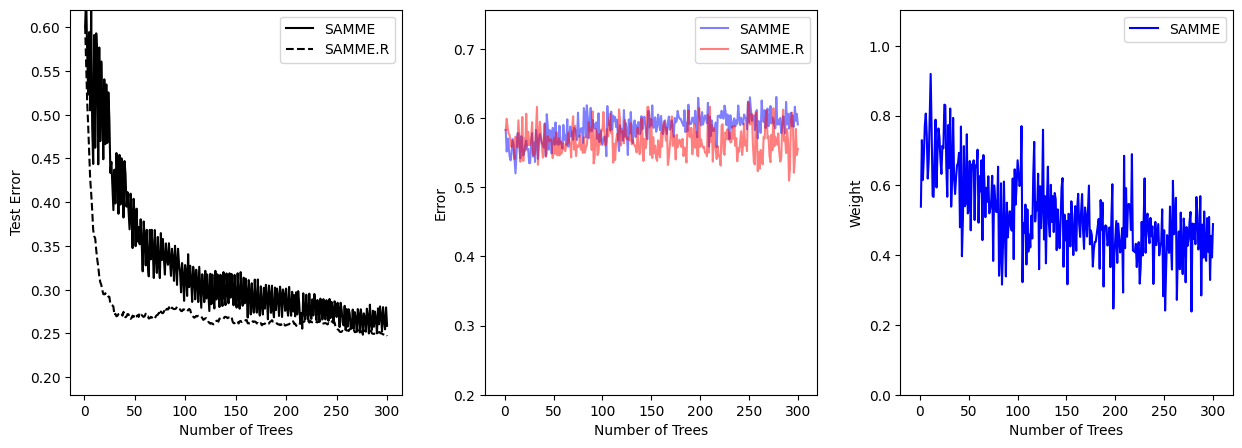

In [1]:
# Author: Noel Dawe <noel.dawe@gmail.com>
#
# License: BSD 3 clause

import matplotlib.pyplot as plt

from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


X, y = make_gaussian_quantiles(
    n_samples=13000, n_features=10, n_classes=3, random_state=1
)

n_split = 3000

X_train, X_test = X[:n_split], X[n_split:]
y_train, y_test = y[:n_split], y[n_split:]

bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=1
)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=300,
    learning_rate=1.5,
    algorithm="SAMME",
)

bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)

real_test_errors = []
discrete_test_errors = []

for real_test_predict, discrete_test_predict in zip(
    bdt_real.staged_predict(X_test), bdt_discrete.staged_predict(X_test)
):
    real_test_errors.append(1.0 - accuracy_score(real_test_predict, y_test))
    discrete_test_errors.append(1.0 - accuracy_score(discrete_test_predict, y_test))

n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1), discrete_test_errors, c="black", label="SAMME")
plt.plot(
    range(1, n_trees_real + 1),
    real_test_errors,
    c="black",
    linestyle="dashed",
    label="SAMME.R",
)
plt.legend()
plt.ylim(0.18, 0.62)
plt.ylabel("Test Error")
plt.xlabel("Number of Trees")

plt.subplot(132)
plt.plot(
    range(1, n_trees_discrete + 1),
    discrete_estimator_errors,
    "b",
    label="SAMME",
    alpha=0.5,
)
plt.plot(
    range(1, n_trees_real + 1), real_estimator_errors, "r", label="SAMME.R", alpha=0.5
)
plt.legend()
plt.ylabel("Error")
plt.xlabel("Number of Trees")
plt.ylim((0.2, max(real_estimator_errors.max(), discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights, "b", label="SAMME")
plt.legend()
plt.ylabel("Weight")
plt.xlabel("Number of Trees")
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()